<a href="https://colab.research.google.com/github/nichakornchaisuwan/multivariaet/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [6]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas

In [7]:
Name = 'ณิชากร ไชยสุวรรณ'
ID = '6230205218'

In [8]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [9]:
Data = DataGenerator(Name,ID)

020:30:16


In [10]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,-10.187117,5.645359,-1.512009,-8.408605,-7.160649,8.152055,-5.137610,-8.514089,-6.140884,10.495298,1.590252,3.370453,0.659568,5.630557,1.300547,2.487644,6.066393,8.233752,-9.202617,-5.345057,5.844010,1.529182,-3.323277,3.321481,2.621559,-4.425307,4.524257,-4.957104,6.386672,-10.452964,11.290718,-50.264820
1,8.802957,-9.680265,-5.146325,-1.400457,4.109127,9.107175,8.461001,1.703898,-0.734701,-0.662673,3.817067,1.822420,4.052866,-3.271882,7.773785,7.411452,-4.505587,2.963060,7.674272,-9.869400,-8.226315,8.427967,5.859954,2.930561,4.895293,-7.116522,-8.471998,5.241182,-1.075735,4.753808,-19.360529,25.769040
2,4.566708,10.088068,6.267673,-5.007461,-6.157636,-4.656535,9.834261,1.608311,6.068735,-10.170915,7.084125,-9.178798,-7.684204,-11.860847,-3.715293,-3.697722,9.908313,6.599582,0.364110,7.548956,-8.481781,5.089799,-7.056839,-5.440225,7.366136,-6.099482,5.900475,-0.567453,3.676044,3.636315,20.176137,20.181577
3,-1.557750,-5.619996,-0.729111,7.873232,-7.234014,-3.057497,-2.156534,-4.396004,-8.843602,-6.002348,6.974013,-6.001278,-8.506518,-2.456330,1.138076,-3.899233,9.395032,-6.214876,9.013846,1.558676,6.049342,2.618855,-7.194114,-10.214505,8.954457,7.642740,4.098489,-1.835569,-1.134072,7.054722,-11.239992,37.273609
4,9.105714,-10.918593,-6.447384,1.260397,6.235345,10.998694,9.431398,4.326759,-1.366271,0.720983,2.657494,5.502511,6.129621,-1.155109,9.711989,5.343099,-7.353672,2.485260,7.425995,-9.048266,-7.630582,7.810077,6.552491,3.859978,5.717528,-3.768863,-7.753635,5.075417,-1.536883,5.055226,-21.837186,27.276130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.012739,-5.982394,-2.377600,3.991366,2.066386,8.939499,3.515521,-0.687216,-7.096250,-0.483933,-3.487503,-6.412030,1.698171,5.591985,2.200870,1.710173,4.215186,7.796989,7.679128,5.763228,-5.406276,-5.459429,8.663905,-0.663315,-1.347786,1.658434,4.270892,5.375995,-0.445427,10.680069,-11.964788,55.400344
9996,1.971844,9.351393,5.487986,5.947889,-8.621342,5.833916,-0.831200,0.799592,2.719228,-3.751520,-4.101230,3.144996,3.296714,7.119346,3.873315,-10.067322,-7.486359,5.966499,-6.699479,-5.169989,7.498531,8.563825,0.733198,-6.472467,4.942586,-0.162590,2.895984,5.859200,1.094162,0.813355,18.702787,6.066777
9997,4.313977,7.818759,6.398568,-4.755216,-5.181228,-3.405445,11.223262,3.490421,6.006418,-9.669740,6.020925,-9.548196,-8.811076,-9.948476,-4.142153,-3.013274,8.687351,7.583746,1.857641,5.131343,-10.503256,2.915657,-8.064281,-3.891103,7.350757,-5.370867,5.108498,0.922176,3.686926,3.322278,15.637518,18.611389
9998,3.029997,-7.750469,9.031552,9.307987,-1.619870,1.449752,-2.457904,6.772582,-7.931218,8.501263,6.798074,1.240366,4.155902,6.037059,0.815239,-5.158712,-5.980060,5.424738,4.949754,-0.027357,9.037065,-4.983274,-2.470661,-4.061016,-3.000973,3.853341,-7.830560,2.054371,2.182887,-10.723758,-15.500938,-51.618788


In [11]:
Data.shape #เพื่อดูขนาดของข้อมูล

(10000, 32)

ตัดข้อมูลที่มี correlation กัน เพื่อลดข้อมูลที่ซ้ำกันออกจาก Data

In [12]:
corr = np.corrcoef(Data.to_numpy().T)

In [13]:
corr.shape #เพื่อดูขนาดของความสัมพันธ์

(32, 32)

In [14]:
corr

array([[ 1.        , -0.05083607,  0.10638536, ...,  0.27341509,
        -0.05083607,  0.27341509],
       [-0.05083607,  1.        ,  0.11548714, ...,  0.01997763,
         1.        ,  0.01997763],
       [ 0.10638536,  0.11548714,  1.        , ..., -0.23673439,
         0.11548714, -0.23673439],
       ...,
       [ 0.27341509,  0.01997763, -0.23673439, ...,  1.        ,
         0.01997763,  1.        ],
       [-0.05083607,  1.        ,  0.11548714, ...,  0.01997763,
         1.        ,  0.01997763],
       [ 0.27341509,  0.01997763, -0.23673439, ...,  1.        ,
         0.01997763,  1.        ]])

In [15]:
for i in range(corr.shape[0]):
  for j in range(corr.shape[1]):
    if(i!= j) and (corr[i,j]==1.):
      print(f'row ={i} column = {j} corrcoef = {corr[i,j]}')

row =1 column = 30 corrcoef = 1.0
row =30 column = 1 corrcoef = 1.0


หลังจากการทำการวนซ้ำ จะเห็นว่ามีการซ้ำกันของขอมูล จึงต้องทำการตัดข้อมูลออก

In [18]:
new_Data = Data.iloc[:,1:-2]
new_Data

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,5.645359,-1.512009,-8.408605,-7.160649,8.152055,-5.137610,-8.514089,-6.140884,10.495298,1.590252,3.370453,0.659568,5.630557,1.300547,2.487644,6.066393,8.233752,-9.202617,-5.345057,5.844010,1.529182,-3.323277,3.321481,2.621559,-4.425307,4.524257,-4.957104,6.386672,-10.452964
1,-9.680265,-5.146325,-1.400457,4.109127,9.107175,8.461001,1.703898,-0.734701,-0.662673,3.817067,1.822420,4.052866,-3.271882,7.773785,7.411452,-4.505587,2.963060,7.674272,-9.869400,-8.226315,8.427967,5.859954,2.930561,4.895293,-7.116522,-8.471998,5.241182,-1.075735,4.753808
2,10.088068,6.267673,-5.007461,-6.157636,-4.656535,9.834261,1.608311,6.068735,-10.170915,7.084125,-9.178798,-7.684204,-11.860847,-3.715293,-3.697722,9.908313,6.599582,0.364110,7.548956,-8.481781,5.089799,-7.056839,-5.440225,7.366136,-6.099482,5.900475,-0.567453,3.676044,3.636315
3,-5.619996,-0.729111,7.873232,-7.234014,-3.057497,-2.156534,-4.396004,-8.843602,-6.002348,6.974013,-6.001278,-8.506518,-2.456330,1.138076,-3.899233,9.395032,-6.214876,9.013846,1.558676,6.049342,2.618855,-7.194114,-10.214505,8.954457,7.642740,4.098489,-1.835569,-1.134072,7.054722
4,-10.918593,-6.447384,1.260397,6.235345,10.998694,9.431398,4.326759,-1.366271,0.720983,2.657494,5.502511,6.129621,-1.155109,9.711989,5.343099,-7.353672,2.485260,7.425995,-9.048266,-7.630582,7.810077,6.552491,3.859978,5.717528,-3.768863,-7.753635,5.075417,-1.536883,5.055226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-5.982394,-2.377600,3.991366,2.066386,8.939499,3.515521,-0.687216,-7.096250,-0.483933,-3.487503,-6.412030,1.698171,5.591985,2.200870,1.710173,4.215186,7.796989,7.679128,5.763228,-5.406276,-5.459429,8.663905,-0.663315,-1.347786,1.658434,4.270892,5.375995,-0.445427,10.680069
9996,9.351393,5.487986,5.947889,-8.621342,5.833916,-0.831200,0.799592,2.719228,-3.751520,-4.101230,3.144996,3.296714,7.119346,3.873315,-10.067322,-7.486359,5.966499,-6.699479,-5.169989,7.498531,8.563825,0.733198,-6.472467,4.942586,-0.162590,2.895984,5.859200,1.094162,0.813355
9997,7.818759,6.398568,-4.755216,-5.181228,-3.405445,11.223262,3.490421,6.006418,-9.669740,6.020925,-9.548196,-8.811076,-9.948476,-4.142153,-3.013274,8.687351,7.583746,1.857641,5.131343,-10.503256,2.915657,-8.064281,-3.891103,7.350757,-5.370867,5.108498,0.922176,3.686926,3.322278
9998,-7.750469,9.031552,9.307987,-1.619870,1.449752,-2.457904,6.772582,-7.931218,8.501263,6.798074,1.240366,4.155902,6.037059,0.815239,-5.158712,-5.980060,5.424738,4.949754,-0.027357,9.037065,-4.983274,-2.470661,-4.061016,-3.000973,3.853341,-7.830560,2.054371,2.182887,-10.723758


In [19]:
new_Data.shape

(10000, 29)

ทำ Clustering แล้วทำ Visualize ของข้อมูลแบบสองมิติ

Import

In [20]:
from sklearn.cluster import KMeans

Define

In [27]:
kmeans = KMeans(n_clusters=3,random_state=2021)

fit-transform

In [28]:
kmeans.fit(new_Data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

In [29]:
kmeans.cluster_centers_

array([[-1.5456627 ,  0.25781517,  2.40928773, -0.10750198, -0.88632014,
        -2.49835529, -0.22768456, -2.46378259,  4.38559333,  1.87623604,
         3.5948659 ,  2.69541412,  4.71442694, -0.973899  ,  3.4990912 ,
         3.5080643 ,  2.21015434, -4.346085  ,  3.78462975,  0.15743889,
        -0.76703649, -2.13559153,  1.01782694, -2.48636489, -4.47607081,
        -2.2031181 ,  0.07729235,  1.34740627, -6.68158328],
       [ 1.47882354, -2.8933356 ,  0.5357953 ,  1.92347044, -3.62212321,
         4.35447446,  1.0156692 ,  2.1086338 , -3.32862248,  1.66950039,
        -3.06018237, -3.78770297, -4.14528077, -3.56080701, -0.41180727,
         1.60886296, -0.07951553,  3.65054853, -2.93566402,  1.41744566,
        -2.205982  , -1.71796173, -3.80952897,  6.75212935, -0.78810482,
         2.18060378, -0.01692502,  2.06719533,  3.5196445 ],
       [-0.15730541,  1.67045332,  3.86578222, -2.02619681,  7.62319369,
         4.66858531, -0.90355063,  0.03175224, -2.2460016 , -0.75573018,
  

In [32]:
y=kmeans.predict(new_Data)
y

array([0, 2, 1, ..., 1, 0, 1], dtype=int32)

###Visualize

ทำการลด Dimension โดยวิธี PCA

In [33]:
from sklearn.decomposition import PCA

In [34]:
pca=PCA(n_components=2)

In [35]:
new_pca=pca.fit_transform(new_Data)

In [41]:
import matplotlib

In [39]:
from matplotlib import pyplot as plt

In [52]:
matplotlib.rcParams['figure.figsize']=[10,10]

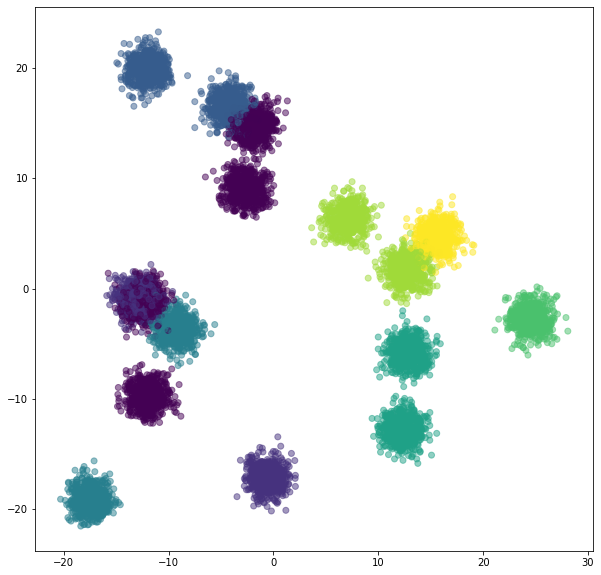

In [54]:
kmeans=KMeans(random_state=2021)
kmeans.fit(new_Data)
y=kmeans.predict(new_Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y,alpha=0.5);